# Execute Sentiment-Based News Enrichment Plan

This notebook executes the updated high-level plan for automated news enrichment using transformer-based NLP models. Each section corresponds to a major step in the workflow.

## 1. Import Required Libraries
Import standard libraries and all required modules for plan execution.

In [1]:
# Standard libraries
import os
import sys
import logging
import pandas as pd
import numpy as np

# HuggingFace transformers
from transformers import pipeline

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

c:\GitHub\mbai-448\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load and Explore the Plan

Load the high-level plan and display its structure for review.

In [2]:
# Define the high-level plan as a list of steps (from agents.md)
plan_steps = [
    "Data loading and inspection",
    "Environment setup and model loading",
    "Sample a single article for exploration",
    "Load pretrained transformer models",
    "Test the models on your sample article",
    "Prepare data for scaled processing",
    "Classify all articles by sentiment",
    "Extract named entities as tags",
    "Generate a FAQ for each article",
    "Summarize all articles",
    "Visualize and review results",
    "Export enriched dataset",
    "(Optional) Self-learning for model improvement"
]

# Display the plan
for i, step in enumerate(plan_steps, 1):
    print(f"Step {i}: {step}")

Step 1: Data loading and inspection
Step 2: Environment setup and model loading
Step 3: Sample a single article for exploration
Step 4: Load pretrained transformer models
Step 5: Test the models on your sample article
Step 6: Prepare data for scaled processing
Step 7: Classify all articles by sentiment
Step 8: Extract named entities as tags
Step 9: Generate a FAQ for each article
Step 10: Summarize all articles
Step 11: Visualize and review results
Step 12: Export enriched dataset
Step 13: (Optional) Self-learning for model improvement


## 3. Execute Plan Steps Programmatically

Iterate through each step in the plan and execute the corresponding code or command. Capture outputs for each step.

In [3]:
# Step 1: Data loading and inspection
try:
    news_df = pd.read_csv('./data/news.csv')
    print(f"Loaded {len(news_df)} articles.")
    display(news_df.head())
except Exception as e:
    logging.error(f"Failed to load news.csv: {e}")
    news_df = None

Loaded 510 articles.


,headline,text
0,UK economy facing 'major risks',The UK manufacturing sector will continue to f...
1,Aids and climate top Davos agenda,Climate change and the fight against Aids are ...
2,Asian quake hits European shares,Shares in Europe's leading reinsurers and trav...
3,India power shares jump on debut,"Shares in India's largest power producer, Nati..."
4,Lacroix label bought by US firm,Luxury goods group LVMH has sold its loss-maki...


In [4]:
# Step 2: Environment setup and model loading
try:
    sentiment_model = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment-latest')
    ner_model = pipeline('ner', model='dslim/bert-base-NER')
    qa_model = pipeline('question-answering', model='deepset/roberta-base-squad2')
    summarizer = pipeline('text-generation', model='gpt2')
    print("All models loaded successfully.")
except Exception as e:
    logging.error(f"Model loading failed: {e}")

INFO: HTTP Request: HEAD https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest/resolve/main/config.json "HTTP/1.1 307 Temporary Redirect"
INFO: HTTP Request: HEAD https://huggingface.co/api/resolve-cache/models/cardiffnlp/twitter-roberta-base-sentiment-latest/3216a57f2a0d9c45a2e6c20157c20c49fb4bf9c7/config.json "HTTP/1.1 200 OK"
INFO: HTTP Request: HEAD https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest/resolve/main/model.safetensors "HTTP/1.1 404 Not Found"
INFO: HTTP Request: GET https://huggingface.co/api/models/cardiffnlp/twitter-roberta-base-sentiment-latest "HTTP/1.1 200 OK"
INFO: HTTP Request: GET https://huggingface.co/api/models/cardiffnlp/twitter-roberta-base-sentiment-latest/commits/main "HTTP/1.1 200 OK"
INFO: HTTP Request: GET https://huggingface.co/api/models/cardiffnlp/twitter-roberta-base-sentiment-latest/discussions?p=0 "HTTP/1.1 200 OK"
Loading weights: 100%|██████████| 201/201 [00:00<00:00, 418.80it/s, Materializing param=robert

All models loaded successfully.


In [5]:
# Step 3: Sample a single article for exploration
if news_df is not None:
    sample_idx = 0
    sample_headline = news_df.at[sample_idx, 'headline'] if 'headline' in news_df.columns else news_df.columns[0]
    sample_text = news_df.at[sample_idx, 'text'] if 'text' in news_df.columns else news_df.iloc[sample_idx, 1]
    print(f"Sample Headline: {sample_headline}\n\nSample Text: {sample_text[:500]}...")

Sample Headline: UK economy facing 'major risks'

Sample Text: The UK manufacturing sector will continue to face "serious challenges" over the next two years, the British Chamber of Commerce (BCC) has said.  The group's quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. The rise came despite exchange rates being cited as a major concern. However, the BCC found the whole UK economy still faced "major risks" and warned that growth is set to slow. It recently forecast economic growth ...


In [6]:
# Step 4: Load pretrained transformer models (already loaded above)
# Step 5: Test the models on your sample article
if news_df is not None:
    print("\nSentiment Analysis:")
    print(sentiment_model(sample_headline))
    print("\nNamed Entity Recognition:")
    print(ner_model(sample_text[:512]))
    print("\nQuestion Answering:")
    question = "What is this article about?"
    print(qa_model(question=question, context=sample_text[:1024]))
    print("\nSummarization:")
    print(summarizer("Summarize: " + sample_text[:1024]))


Sentiment Analysis:
[{'label': 'negative', 'score': 0.6050862669944763}]

Named Entity Recognition:
[{'entity': 'B-LOC', 'score': np.float32(0.99948573), 'index': 2, 'word': 'UK', 'start': 4, 'end': 6}, {'entity': 'B-ORG', 'score': np.float32(0.99933606), 'index': 20, 'word': 'British', 'start': 100, 'end': 107}, {'entity': 'I-ORG', 'score': np.float32(0.9990872), 'index': 21, 'word': 'Chamber', 'start': 108, 'end': 115}, {'entity': 'I-ORG', 'score': np.float32(0.9994103), 'index': 22, 'word': 'of', 'start': 116, 'end': 118}, {'entity': 'I-ORG', 'score': np.float32(0.9992132), 'index': 23, 'word': 'Commerce', 'start': 119, 'end': 127}, {'entity': 'B-ORG', 'score': np.float32(0.99925035), 'index': 25, 'word': 'BC', 'start': 129, 'end': 131}, {'entity': 'I-ORG', 'score': np.float32(0.999137), 'index': 26, 'word': '##C', 'start': 131, 'end': 132}, {'entity': 'B-ORG', 'score': np.float32(0.9993753), 'index': 75, 'word': 'BC', 'start': 367, 'end': 369}, {'entity': 'I-ORG', 'score': np.floa

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


{'score': 0.00027493672678247094, 'start': 0, 'end': 69, 'answer': 'The UK manufacturing sector will continue to face "serious challenges'}

Summarization:
[{'generated_text': 'Summarize: The UK manufacturing sector will continue to face "serious challenges" over the next two years, the British Chamber of Commerce (BCC) has said.  The group\'s quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. The rise came despite exchange rates being cited as a major concern. However, the BCC found the whole UK economy still faced "major risks" and warned that growth is set to slow. It recently forecast economic growth will slow from more than 3% in 2004 to a little below 2.5% in both 2005 and 2006.  Manufacturers\' domestic sales growth fell back slightly in the quarter, the survey of 5,196 firms found. Employment in manufacturing also fell and job expectations were at their lowest level for a year.  "Despite some positive 

In [7]:
# Step 6: Prepare data for scaled processing
if news_df is not None:
    sample_df = news_df.sample(n=min(100, len(news_df)), random_state=42).reset_index(drop=True)
    print(f"Sampled {len(sample_df)} articles for batch processing.")
    display(sample_df.head())

Sampled 100 articles for batch processing.


,headline,text
0,Ericsson sees earnings improve,Telecoms equipment supplier Ericsson has poste...
1,Kraft cuts snack ads for children,Kraft plans to cut back on advertising of prod...
2,Worldcom boss 'left books alone',"Former Worldcom boss Bernie Ebbers, who is acc..."
3,Steady job growth continues in US,The US created fewer jobs than expected in Dec...
4,Boeing unveils new 777 aircraft,US aircraft firm Boeing has unveiled its new l...


In [8]:
# Step 7: Classify all articles by sentiment
def classify_sentiment(text):
    try:
        result = sentiment_model(text[:512])[0]
        label = result['label']
        score = result['score']
        if label == 'positive' and score > 0.7:
            return 'Good News 🎉'
        elif label == 'negative' and score > 0.7:
            return 'Bad News 👎'
        else:
            return 'Just News 🤷'
    except Exception as e:
        logging.warning(f"Sentiment classification failed: {e}")
        return 'Review Needed'

if news_df is not None:
    sample_df['category'] = sample_df['headline'].apply(classify_sentiment)
    display(sample_df[['headline', 'category']].head())

,headline,category
0,Ericsson sees earnings improve,Good News 🎉
1,Kraft cuts snack ads for children,Just News 🤷
2,Worldcom boss 'left books alone',Just News 🤷
3,Steady job growth continues in US,Just News 🤷
4,Boeing unveils new 777 aircraft,Good News 🎉


In [9]:
# Step 8: Extract named entities as tags
def extract_entities(text):
    try:
        entities = ner_model(text[:512])
        tags = list(set([ent['word'] for ent in entities if ent['score'] > 0.7]))
        return tags
    except Exception as e:
        logging.warning(f"NER failed: {e}")
        return []

if news_df is not None:
    sample_df['tags'] = sample_df['text'].apply(extract_entities)
    display(sample_df[['headline', 'tags']].head())

,headline,tags
0,Ericsson sees earnings improve,"[##sson, ##ek, ##om, Deutsche, Tel, Eric]"
1,Kraft cuts snack ads for children,"[##eo, ##si, US, ##o, Aid, ##ol, ##raft, K, Ko..."
2,Worldcom boss 'left books alone',"[E, ##com, Bernie, David, World, Myers, ##bbe,..."
3,Steady job growth continues in US,"[Department, US, Labor]"
4,Boeing unveils new 777 aircraft,"[European, US, Boeing, Airbus, Sydney, London]"


In [10]:
# Step 9: Generate a FAQ for each article
def generate_faq(row):
    try:
        question = f"What is the main point of this article?"
        answer = qa_model(question=question, context=row['text'][:1024])['answer']
        return {'question': question, 'answer': answer}
    except Exception as e:
        logging.warning(f"FAQ generation failed: {e}")
        return {'question': None, 'answer': None}

if news_df is not None:
    sample_df['faq'] = sample_df.apply(generate_faq, axis=1)
    display(sample_df[['headline', 'faq']].head())

,headline,faq
0,Ericsson sees earnings improve,{'question': 'What is the main point of this a...
1,Kraft cuts snack ads for children,{'question': 'What is the main point of this a...
2,Worldcom boss 'left books alone',{'question': 'What is the main point of this a...
3,Steady job growth continues in US,{'question': 'What is the main point of this a...
4,Boeing unveils new 777 aircraft,{'question': 'What is the main point of this a...


In [12]:
# Step 10: Summarize all articles
def summarize_text(text):
    try:
        import time
        start = time.time()
        result = summarizer("Summarize: " + text[:1024], max_length=60)
        print(f"Generation took {time.time() - start:.2f} seconds")
        return result[0]['generated_text']
    except Exception as e:
        logging.warning(f"Summarization failed: {e}")
        return None

if news_df is not None:
    sample_df['summary'] = sample_df['text'].apply(summarize_text)
    display(sample_df[['headline', 'summary']].head())

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.62 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 9.73 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 10.46 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 19.81 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.66 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 10.84 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.97 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 17.72 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 2.19 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.46 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 15.93 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.44 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.48 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.82 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.77 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.46 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 0.64 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.53 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.02 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.01 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.60 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 8.87 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.77 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.65 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.84 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.63 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 15.11 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.94 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.38 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 6.21 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.49 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.38 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 15.36 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 2.88 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.75 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.87 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.20 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.81 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.62 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.68 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.64 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 7.17 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.96 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.51 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 848.36 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 7.41 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.85 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.85 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.77 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 6.80 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 16.62 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 15.13 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.91 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.61 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.72 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.99 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.90 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.53 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.39 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.89 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.83 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.83 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.64 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.08 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.80 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.71 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.75 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.23 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.89 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 9.85 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.83 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.56 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 16.31 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.73 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 11.11 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.52 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 15.64 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 16.75 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 16.03 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.69 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 15.53 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.73 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.74 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.74 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 14.89 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 12.51 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 11.90 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 4.64 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.30 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 10.46 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.52 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 9.28 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 11.34 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 1.28 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.54 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.21 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 9.42 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.31 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generation took 13.48 seconds
Generation took 12.94 seconds


,headline,summary
0,Ericsson sees earnings improve,Summarize: Telecoms equipment supplier Ericsso...
1,Kraft cuts snack ads for children,Summarize: Kraft plans to cut back on advertis...
2,Worldcom boss 'left books alone',"Summarize: Former Worldcom boss Bernie Ebbers,..."
3,Steady job growth continues in US,Summarize: The US created fewer jobs than expe...
4,Boeing unveils new 777 aircraft,Summarize: US aircraft firm Boeing has unveile...


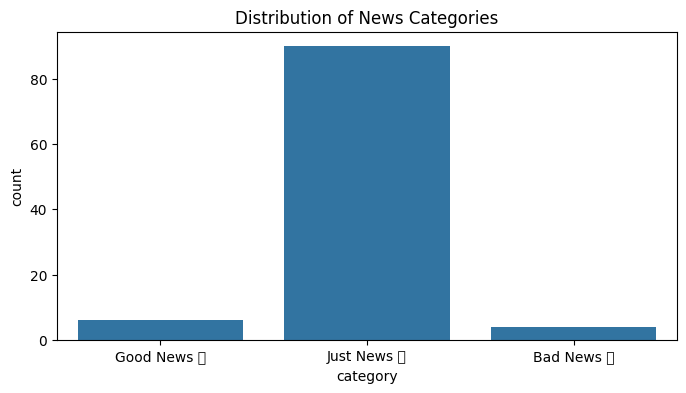


Sample enriched record:


,0
headline,Ericsson sees earnings improve
text,Telecoms equipment supplier Ericsson has poste...
category,Good News 🎉
tags,"[##sson, ##ek, ##om, Deutsche, Tel, Eric]"
faq,{'question': 'What is the main point of this a...
summary,Summarize: Telecoms equipment supplier Ericsso...


In [13]:
# Step 11: Visualize and review results
if news_df is not None:
    plt.figure(figsize=(8,4))
    sns.countplot(x='category', data=sample_df)
    plt.title('Distribution of News Categories')
    plt.show()
    print("\nSample enriched record:")
    display(sample_df.head(1).T)

In [14]:
# Step 12: Export enriched dataset
if news_df is not None:
    try:
        sample_df.to_csv('enriched_news_sample.csv', index=False)
        print("Enriched dataset exported to enriched_news_sample.csv")
    except Exception as e:
        logging.error(f"Export failed: {e}")

Enriched dataset exported to enriched_news_sample.csv


## 4. Display Execution Results

Results for each step are shown above. Review the outputs, visualizations, and exported files for evidence of successful execution.

## 5. Handle and Log Errors

All errors and warnings are logged using the logging module and displayed inline for traceability and debugging.